# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.It has these columns (popularity, budget, revenue, original_title, director,taglin, overview, runtime, genres,production_companies,release_date, vote_count, vote_average, release_year,budget_adj, revenue_adj). The two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. 


### Question(s) for Analysis
These are the questions I will address Which genres are most popular from year to year?
What kinds of properties are associated with movies that have high revenues?
What is the averege duration of a movie?
What are the movie genres that make the most money?
What are the top 5 directors whose movies generated the most revenue?.

In [3]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Upgrading pandas 
!pip install --upgrade pandas==0.23.0

Requirement already up-to-date: pandas==0.23.0 in /opt/conda/lib/python3.6/site-packages (0.23.0)


<a id='wrangling'></a>
## Data Wrangling


In [4]:
# Loading our data and printing out a few lines.
df=pd.read_csv("tmdb-movies.csv",index_col='id')
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# looking at data types?
df.dtypes

imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:

# Checking for duplicates
df.duplicated().sum()

1



### Data Cleaning



In [7]:
# we just need to convert the data type of release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'],infer_datetime_format=True)

In [8]:
#Dropping the duplicate rows
df.drop_duplicates(inplace=True)

In [9]:
# splitting genres data to include 1 vallue per row
genres_df = df['genres'].str.split("|", expand=True)
# merging the original df with the new one
df_merged = df.merge(genres_df,left_index=True, right_index=True) 
genres_df = genres_df.stack() 
genres_df = pd.DataFrame(genres_df)
genres_df = genres_df.reset_index(level=0)
df_merged = df.merge(genres_df,left_index=True, right_on='id') 

# let's confirm
df_merged.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,id,0
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,135397,Action
1,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,135397,Adventure
2,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,135397,Science Fiction
3,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,135397,Thriller
0,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,76341,Action


In [10]:
#renaming the genres col
df_merged.rename(columns={0:'genres_adj'},inplace=True)
df_merged.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,id,genres_adj
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,135397,Action
1,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,135397,Adventure
2,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,135397,Science Fiction
3,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,135397,Thriller
0,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,76341,Action


In [11]:
# removing unwanted cols from both datasets
unwanted_cols = ['imdb_id', 'homepage', 'cast','keywords','overview']
df_merged.drop(unwanted_cols, axis=1, inplace=True)
df.drop(unwanted_cols, axis=1, inplace=True)
#Droping the original genres column that contains multiple entries
df_merged.drop('genres', axis=1, inplace=True)
df_merged.head()

,popularity,budget,revenue,original_title,director,tagline,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,id,genres_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,135397,Action
1,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,135397,Adventure
2,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,135397,Science Fiction
3,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,135397,Thriller
0,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,120,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,76341,Action


In [12]:
#Let's deal with tagline's missing values for both datasets
df.tagline.fillna('No Tagline', inplace=True)
df_merged.tagline.fillna('No Tagline', inplace=True)

In [13]:
# let's look at the dataframe to see what we've done so far
df.head()

,popularity,budget,revenue,original_title,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,190000000,1506249360,Furious 7,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09




<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.




# defining our fuctions

In [14]:
#defining a function that returns the top 5 (by default) revenue making based on the column variable
def top_rev(df,col,n=5):
    """"
    df: the dataframe we will exctract data from
    col: the name of the col we will compare it with revenue
    """
    return df.groupby(col).revenue_adj.sum().nlargest(n).to_frame()

__________________________________________________________________________________________________

In [15]:
# let's classify our columns into categorical and numerical columns
cat_cols = df.select_dtypes(exclude=[np.number])
num_cols = df.select_dtypes(include=[np.number])

In [16]:
#all categorical  columns
cat_cols.head(1)

,original_title,director,tagline,genres,production_companies,release_date
id,,,,,,
135397,Jurassic World,Colin Trevorrow,The park is open.,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09


In [17]:
#all numerical columns
num_cols.head(1)

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,
135397,32.985763,150000000,1513528810,124,5562,6.5,2015,1.379999e+08,1.392446e+09


### Research Question 1 (Which genres are most popular from year to year?)

In [18]:
#creating a decade column 
bin_edges = [1960,1970,1980,1990,2000,2010,2020]
bin_names = ['60s','70s','80s','90s','00s','10s']
df_merged['decade']=pd.cut(df_merged['release_year'], bin_edges, labels=bin_names,include_lowest=True)# setting this opotional argument to true to include the  the lower bound
# Let's confirm our work
df_merged.query('release_year==release_year.min()')[['decade','release_year']].head()

,decade,release_year
0,60s,1960
1,60s,1960
2,60s,1960
0,60s,1960
1,60s,1960


In [21]:
# grouping our data by decade,movie genre and calculating the mean popularity for each 
gen_pop_per_decade=df_merged.groupby(['decade','genres_adj']).popularity.mean().unstack('decade')
gen_pop_per_decade

decade,60s,70s,80s,90s,00s,10s
genres_adj,,,,,,
Action,0.493220,0.631759,0.687290,0.708881,0.881846,1.424935
Adventure,0.727036,0.800457,0.810527,0.814942,1.088750,1.958744
Animation,0.822127,0.602950,0.591406,0.898844,0.806332,0.975820
Comedy,0.412801,0.431054,0.507422,0.552219,0.587292,0.732871
Crime,0.460005,0.536128,0.495904,0.792339,0.699155,1.037146
Documentary,0.163332,0.169743,0.185965,0.186796,0.201654,0.169192
Drama,0.393869,0.468485,0.471242,0.574643,0.560730,0.744711
Family,0.605180,0.496631,0.668730,0.650840,0.855408,0.942495
Fantasy,0.354299,0.571046,0.600399,0.782973,1.149187,1.360257


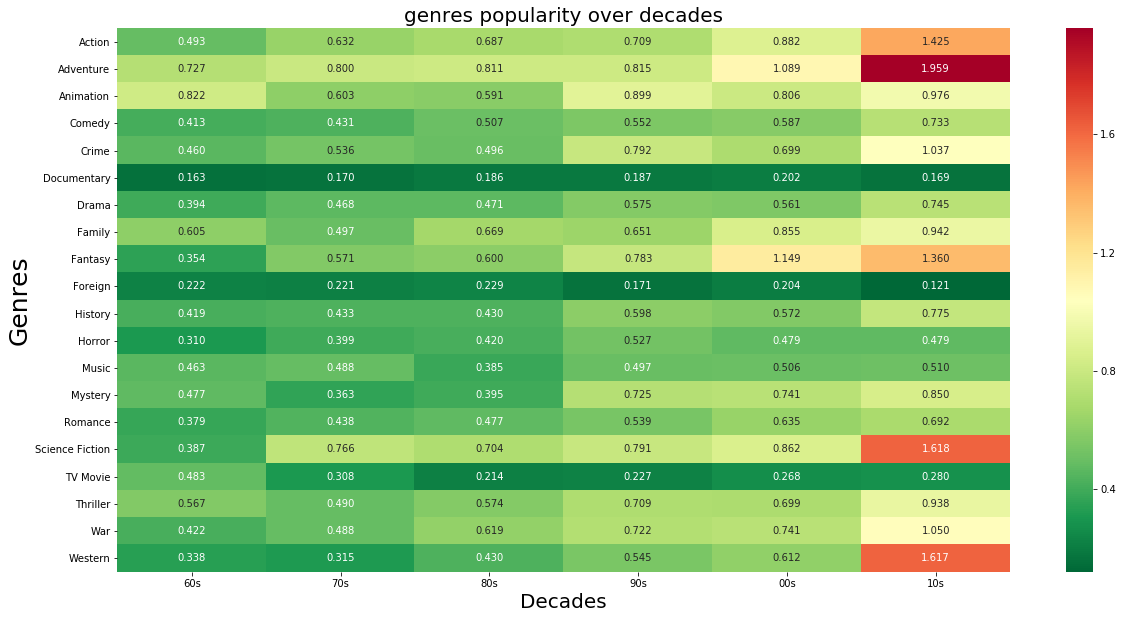

In [23]:
# Making a heatmap that illustrates the average popularity of movie genres for each decade in our dataset.
plt.figure(figsize=(20,10))
sns.heatmap(gen_pop_per_decade
            ,annot=True,fmt=".3f",
            cmap="RdYlGn_r");
plt.xlabel('Decades', fontsize=20  )
plt.ylabel('Genres', fontsize=25 )
plt.title('genres popularity over decades', fontsize=20);
plt.show()

### Q1 Conclusion:

#### In this question, we want to know how popular each movie genre has been over the years, so here is a heatmap that shows al   the genres in this dataset, and on the x-axis, you can see the different decades.A colorful bar shows the relation between values and colors.




## End of the first question

### Research Question 2  (What is the averege duration of a movie?)

In [24]:
avg_movie_time=round(df['runtime'].mean()) #Calculating the mean runtime of all movies
print('The runtime of the averege movie in our dataset is {} minutes'.format(avg_movie_time)) # Printing some foramted string

The runtime of the averege movie in our dataset is 102.0 minutes


### Q2 Conclusion:

#### The average movie is about an hour and a half long.

## End of the second question

### Research Question 3  (What are the movie genres that make the most money?)

In [25]:
#These are the 5 most revenue-generating movie genres.
top_rev(df_merged,'genres_adj')

,revenue_adj
genres_adj,
Action,2.187517e+11
Adventure,2.084043e+11
Drama,1.923856e+11
Comedy,1.816733e+11
Thriller,1.607167e+11


### Q3 Conclusion:

#### The analysis of this question shows that action and adventure movies generated the most revenue.
 

## End of the third question

### Research Question 4  (What are the top 5 directors whose movies generated the most revenue?)

In [26]:
#These are the 5 most directors whose movies generated the highest amount of revenue.
top_rev(df_merged,'director')

,revenue_adj
director,
Steven Spielberg,4.148326e+10
James Cameron,2.465025e+10
Robert Zemeckis,2.025287e+10
Peter Jackson,1.914196e+10
George Lucas,1.839010e+10


### Q3 Conclusion:

#### As we can see, Steven Spielberg's movies had the highest revenue of all.

## End of the fourth question

### Research Question 5  (What kinds of properties are associated with movies that have high revenues?)

In [27]:
# Revenue vs. potential variables
print("The correlatin between rev and movie's budget",round(df_merged['revenue'].corr(df_merged['budget']),2))
print("The correlatin between rev and the run time of movies",round(df_merged['revenue'].corr(df_merged['runtime']),2))

The correlatin between rev and movie's budget 0.73
The correlatin between rev and the run time of movies 0.17


### Q3 Conclusion:
#### It appears that a movie's budget affects how much revenue it makes because of the higher positive correlation of 0.7.

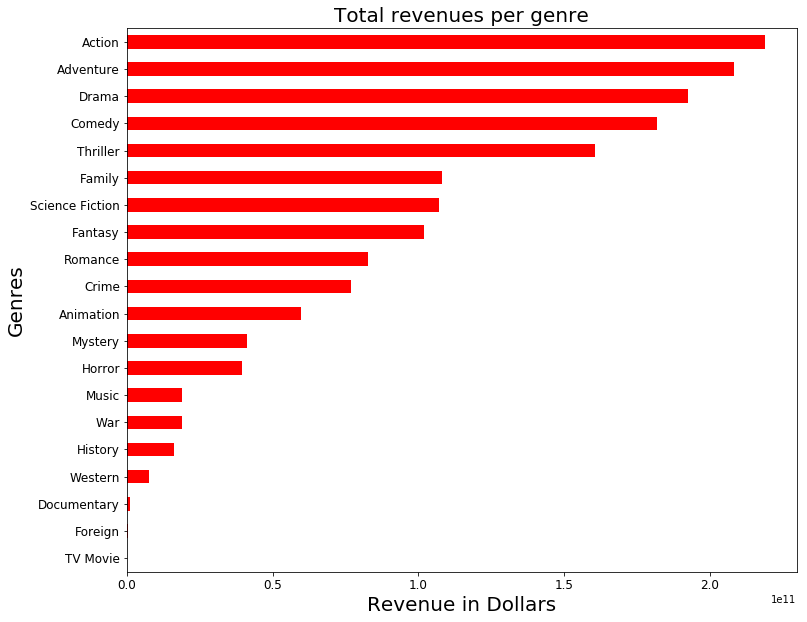

In [28]:
# Which genres generating the highest revenues
df_merged.groupby('genres_adj').revenue_adj.sum().sort_values().plot.barh(color='red', figsize=(12,10), fontsize= 12)
plt.xlabel('Revenue in Dollars', fontsize=20  )
plt.ylabel('Genres', fontsize=20 )
plt.title('Total revenues per genre', fontsize=20);

### Q3 Conclusion:

#### Furthermore, here is a graph that suggests that movie genres are also associated with the amount of revenue.


## End of the fifth question

## Conclusions,limitations

<a id='conclusions'></a>
## Conclusions,Limitation

In this project, I analyzed a dataset containing 10,000 movies collected from The Movie Database (TMDb) and I've answered these questions:

1)Which genres are most popular from year to year?

As a result of this question, I produced a heatmap that shows the decades x-axis and genres y-axis, with each genre represented as six squares corresponding to a decade in our dataset. These average numbers have been displayed in a color that changes as the number increases and decreases based on their average popularity.

2)What is the averege duration of a movie?
In order to answer this question, I calculated the mean movie runtime, which was 1.7 hours.

3)What are the movie genres that make the most money?
As a result, the most revenue-generating movie genres were Action, Adventure, Drama, Comedy, and Thriller respectively.

4)What are the top 5 directors whose movies generated the most revenue?
As with the previous question, I determined that the top five directors were as follows:1-Steven Spielberg
2-James Cameron
3-Robert Zemeckis
4-Peter Jackson
5-George Lucas

5)What kinds of properties are associated with movies that have high revenues?

To answer this question, I analyzed the correlation between revenue and other factors. I found that there was a strong positive correlation of 0.7, which indicates a strong relationship due to its proximity to 1.Then, I examined how changing the movie genre affects revenue and analyzed the data in a chart. The chart shows that action movies were on top.



Limitations:
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.The combined genres’ records requires special treatment to analyze them individually so in the cleaning phase, I've split them to include one record per row.

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0